In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import os
from os.path import join
from datetime import datetime

import plotly.express as px

pd.options.mode.chained_assignment = None

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
market = 'MGP'
dataset = 'DomandaOfferta'
date_range = pd.date_range(start='2023-01-01', end='2023-12-31')

In [4]:
df_list = []

for date in tqdm(date_range):   #iterate in the range specified before 
    
    date = date.strftime('%Y%m%d') #ex. 2019-01-01 --> 20190101
    file_path = join('data', market +'_'+ dataset, str(date) + market + dataset + '.xml') #file path = data/MGP_DomandaOfferta/20190101DomandaOfferta
    
    if not(os.path.exists(file_path)):      #check correct path existance
        print(f"{file_path} not found")
    else:
        df = pd.read_xml(file_path, xpath=f'./{dataset}')  #read xml file and w in df 
    df_list.append(df)

ts_df = pd.concat(df_list, ignore_index=True)  #create a unique dataframe 
ts_df

  0%|          | 0/365 [00:00<?, ?it/s]

,Data,Ora,Mercato,ZonaMercato,PrezzoZonale,Quantita,Prezzo,Tipo
0,20230101,1,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,70000.000,4000.00,OFF
1,20230101,1,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.102,3000.00,OFF
2,20230101,1,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,20.001,800.00,OFF
3,20230101,1,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,7.530,700.00,OFF
4,20230101,1,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.003,632.00,OFF
...,...,...,...,...,...,...,...,...
2965494,20231231,24,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,0.007,0.00,BID
2965495,20231231,24,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,50.000,-0.27,BID
2965496,20231231,24,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,9.000,-3.01,BID
2965497,20231231,24,MGP,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,54.000,-100.00,BID


In [5]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965499 entries, 0 to 2965498
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Data          int64  
 1   Ora           int64  
 2   Mercato       object 
 3   ZonaMercato   object 
 4   PrezzoZonale  float64
 5   Quantita      float64
 6   Prezzo        float64
 7   Tipo          object 
dtypes: float64(3), int64(2), object(3)
memory usage: 181.0+ MB


In [6]:
ts_df['Mercato'].unique()

array(['MGP'], dtype=object)

# data preparation 

In [7]:
#drop Mercato column that have the same costant value MGP
ts_df.drop(['Mercato'], axis=1, inplace=True)
ts_df

,Data,Ora,ZonaMercato,PrezzoZonale,Quantita,Prezzo,Tipo
0,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,70000.000,4000.00,OFF
1,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.102,3000.00,OFF
2,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,20.001,800.00,OFF
3,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,7.530,700.00,OFF
4,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.003,632.00,OFF
...,...,...,...,...,...,...,...
2965494,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,0.007,0.00,BID
2965495,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,50.000,-0.27,BID
2965496,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,9.000,-3.01,BID
2965497,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,54.000,-100.00,BID


In [8]:
ts_df

,Data,Ora,ZonaMercato,PrezzoZonale,Quantita,Prezzo,Tipo
0,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,70000.000,4000.00,OFF
1,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.102,3000.00,OFF
2,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,20.001,800.00,OFF
3,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,7.530,700.00,OFF
4,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.003,632.00,OFF
...,...,...,...,...,...,...,...
2965494,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,0.007,0.00,BID
2965495,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,50.000,-0.27,BID
2965496,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,9.000,-3.01,BID
2965497,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,54.000,-100.00,BID


In [9]:
ts_df.ZonaMercato.value_counts()

ZonaMercato
CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;MALT;COUP;MONT;    1766386
CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;FRAN;GREC;SLOV;SVIZ;MALT;COUP;MONT;          166620
CALA;CNOR;CSUD;NORD;SARD;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;COUP;MONT;               126302
CNOR;NORD;AUST;CORS;FRAN;SLOV;SVIZ;COUP;                                                 121299
CNOR;CSUD;NORD;SARD;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;COUP;MONT;                     96792
CALA;CSUD;SARD;SICI;SUD;COAC;GREC;MALT;MONT;                                              94007
CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;COUP;MONT;           71789
NORD;AUST;FRAN;SLOV;SVIZ;COUP;                                                            69444
CNOR;CSUD;NORD;SARD;AUST;COAC;CORS;FRAN;SLOV;SVIZ;COUP;MONT;                              59731
CALA;CNOR;CSUD;SARD;SICI;SUD;COAC;CORS;GREC;MALT;MONT;                                    53963
CALA;SICI;SUD;GREC;MALT;    

In [10]:
#consider only the situation in which all zonaMercato collaborate in a unique market 
#so only the instances with all zona mercato
df = ts_df.loc[ts_df.ZonaMercato=='CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;MALT;COUP;MONT;']
df

,Data,Ora,ZonaMercato,PrezzoZonale,Quantita,Prezzo,Tipo
0,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,70000.000,4000.00,OFF
1,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.102,3000.00,OFF
2,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,20.001,800.00,OFF
3,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,7.530,700.00,OFF
4,20230101,1,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.003,632.00,OFF
...,...,...,...,...,...,...,...
2965494,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,0.007,0.00,BID
2965495,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,50.000,-0.27,BID
2965496,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,9.000,-3.01,BID
2965497,20231231,24,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,54.000,-100.00,BID


In [11]:
#clear memory
del ts_df

In [12]:
#check
df.ZonaMercato.value_counts()

ZonaMercato
CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CORS;FRAN;GREC;SLOV;SVIZ;MALT;COUP;MONT;    1766386
Name: count, dtype: int64

In [13]:
#merge data and hour in a single column , datetime format
from datetime import datetime

#function to convert data and time formats and create a column that contain both values in datetime format
def converti_data_ora(row):
    data_str = str(row['Data'])
    ora_str = str(row['Ora']-1)  # -1 because the range time is from 0 to 23 so ex. hour 1 corresponds to 00:00
    data_ora_str = data_str[:4] + '-' + data_str[4:6] + '-' + data_str[6:] + ' ' + ora_str + ':00:00'
    return datetime.strptime(data_ora_str, '%Y-%m-%d %H:%M:%S')

df['data_ora'] = df.apply(converti_data_ora, axis=1)
df.drop(['Data','Ora'], axis=1,inplace=True)
df= df.iloc[:,[5,0,1,2,3,4]] #change columns order to have data_ora in 1st position
df

,data_ora,ZonaMercato,PrezzoZonale,Quantita,Prezzo,Tipo
0,2023-01-01 00:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,70000.000,4000.00,OFF
1,2023-01-01 00:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.102,3000.00,OFF
2,2023-01-01 00:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,20.001,800.00,OFF
3,2023-01-01 00:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,7.530,700.00,OFF
4,2023-01-01 00:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,195.90,0.003,632.00,OFF
...,...,...,...,...,...,...
2965494,2023-12-31 23:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,0.007,0.00,BID
2965495,2023-12-31 23:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,50.000,-0.27,BID
2965496,2023-12-31 23:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,9.000,-3.01,BID
2965497,2023-12-31 23:00:00,CALA;CNOR;CSUD;NORD;SARD;SICI;SUD;AUST;COAC;CO...,106.12,54.000,-100.00,BID


In [14]:
#zonamercato now is the same for all the dataset so i can drop it ???
df.drop(['ZonaMercato'], axis=1, inplace=True)
df

,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo
0,2023-01-01 00:00:00,195.90,70000.000,4000.00,OFF
1,2023-01-01 00:00:00,195.90,0.102,3000.00,OFF
2,2023-01-01 00:00:00,195.90,20.001,800.00,OFF
3,2023-01-01 00:00:00,195.90,7.530,700.00,OFF
4,2023-01-01 00:00:00,195.90,0.003,632.00,OFF
...,...,...,...,...,...
2965494,2023-12-31 23:00:00,106.12,0.007,0.00,BID
2965495,2023-12-31 23:00:00,106.12,50.000,-0.27,BID
2965496,2023-12-31 23:00:00,106.12,9.000,-3.01,BID
2965497,2023-12-31 23:00:00,106.12,54.000,-100.00,BID


In [15]:
df.Tipo.value_counts()

Tipo
OFF    1200388
BID     565998
Name: count, dtype: int64

In [16]:
# looking for duplicates rows
duplicate_row = df[df.duplicated()]
duplicate_row


,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766386 entries, 0 to 2965498
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   data_ora      datetime64[ns]
 1   PrezzoZonale  float64       
 2   Quantita      float64       
 3   Prezzo        float64       
 4   Tipo          object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 80.9+ MB


# ydata-profiling

looking for dependencies and insights for df 

In [16]:
from ydata_profiling import ProfileReport
PROFILE = ProfileReport(df, title=" Profiling Report")
PROFILE

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# dependencies between days 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


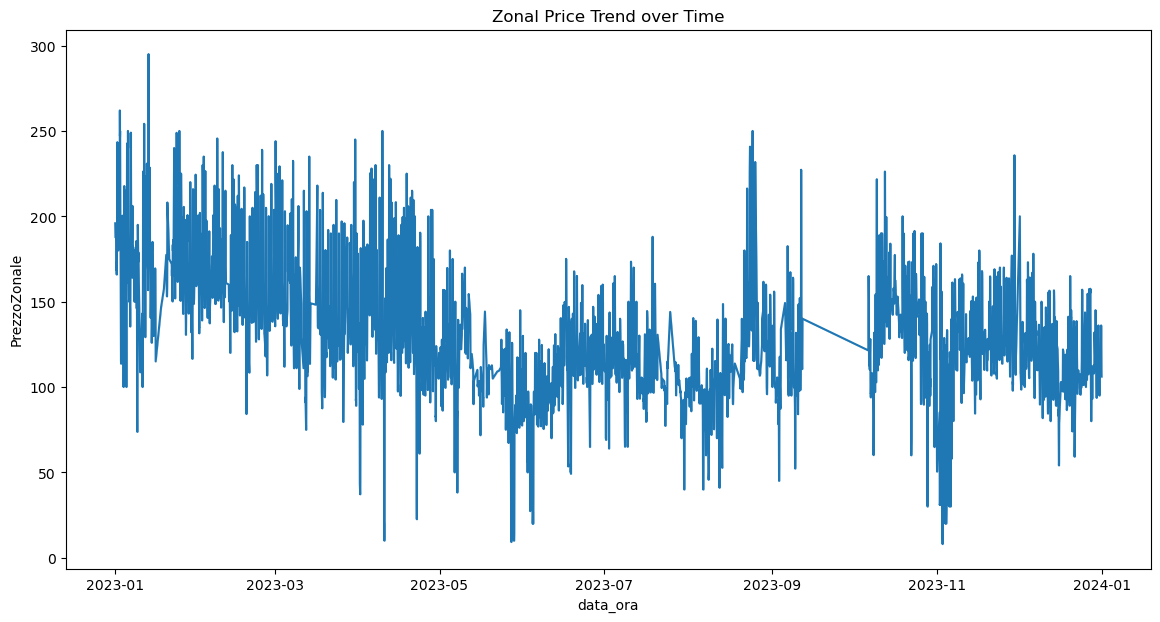

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='data_ora', y='PrezzoZonale', data=df)
plt.title('Zonal Price Trend over Time')
plt.show()

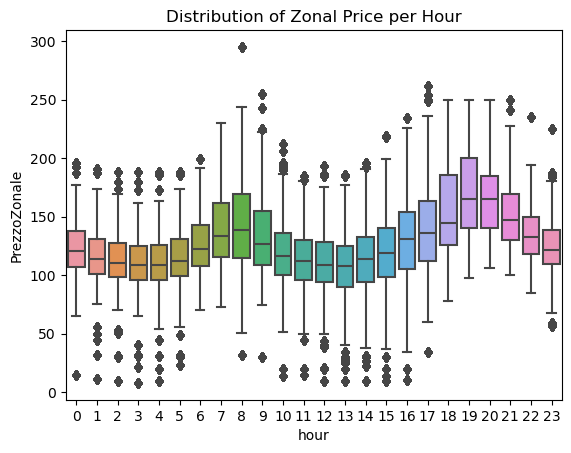

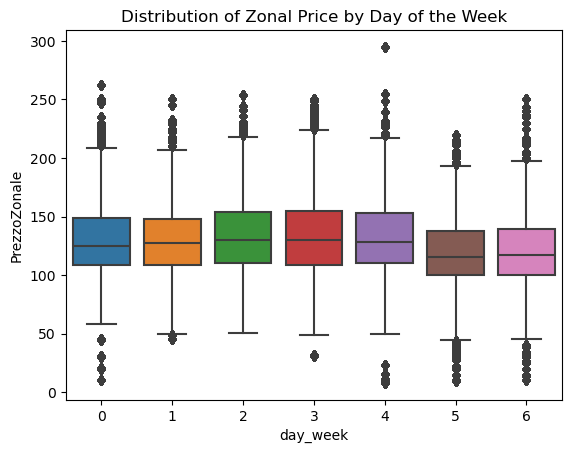

In [21]:
# Extract hours and days of the week
df['hour'] = df['data_ora'].dt.hour
df['day_week'] = df['data_ora'].dt.dayofweek

# Analysis for hours
sns.boxplot(x='hour', y='PrezzoZonale', data=df)
plt.title('Distribution of Zonal Price per Hour')
plt.show()

# Analysis by day of the week
sns.boxplot(x='day_week', y='PrezzoZonale', data=df)
plt.title('Distribution of Zonal Price by Day of the Week')
plt.show()


## correlation for each hour

In [26]:
# Extract the time from the datetime
df['hour'] = df['data_ora'].dt.hour

# A list to save the results
result_correlation_hour = []

for hour in df['hour'].unique():
    df_temp = df[df['ora'] == hour]
    correlation = df_temp[['PrezzoZonale', 'Quantita', 'Prezzo']].corr()
    result_correlation_hour.append((hour, correlation))



Correlation for hour 15:
              PrezzoZonale  Quantita    Prezzo
PrezzoZonale      1.000000  0.004017  0.027081
Quantita          0.004017  1.000000  0.386138
Prezzo            0.027081  0.386138  1.000000


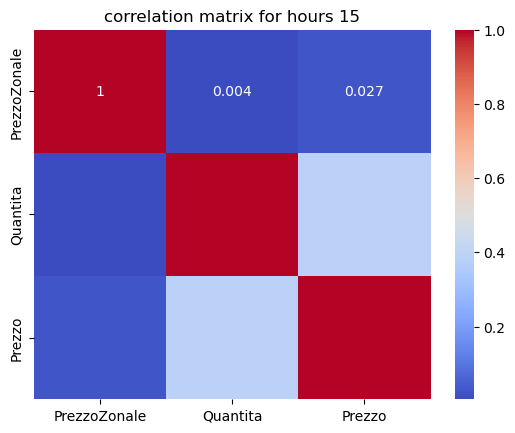

In [27]:
# Example to display correlation for a specific time, e.g. 3:00 p.m.
specific_hour = 15
for ora, corr in result_correlation_hour:
    if ora == specific_hour:
        print(f"Correlation for hour {ora}:")
        print(corr)
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title(f'correlation matrix for hours {ora}')
        plt.show()

## correlation for each day of the week

In [28]:
# Extract the day of the week from the datetime (0 = monday, 6 = sunday)
df['day_week'] = df['data_ora'].dt.dayofweek

# list to save the results 
result_correlation_day = []

for day in df['day_week'].unique():
    df_temp = df[df['day_week'] == day]
    correlation = df_temp[['PrezzoZonale', 'Quantita', 'Prezzo']].corr()
    result_correlation_day.append((day, correlation))




Correlation for day 0 (monday):
              PrezzoZonale  Quantita    Prezzo
PrezzoZonale      1.000000  0.015374  0.036175
Quantita          0.015374  1.000000  0.385206
Prezzo            0.036175  0.385206  1.000000


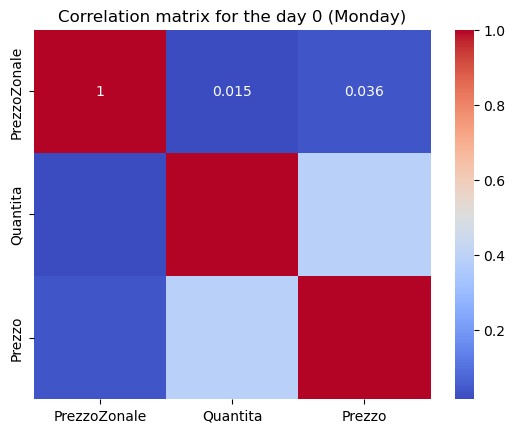

In [30]:
# Example to display the correlation for a specific day, e.g., Monday (0)
specific_day = 0
for day, corr in result_correlation_day:
    if day == specific_day:
        print(f"Correlation for day {day} (monday):")
        print(corr)
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title(f'Correlation matrix for the day {day} (Monday)')
        plt.show()

# BID 

In [18]:
df_bid = df.loc[df['Tipo'] == 'BID']
df_bid


,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo
0,2023-01-01 00:00:00,195.90,70000.000,4000.0,OFF
1,2023-01-01 00:00:00,195.90,0.102,3000.0,OFF
2,2023-01-01 00:00:00,195.90,20.001,800.0,OFF
3,2023-01-01 00:00:00,195.90,7.530,700.0,OFF
4,2023-01-01 00:00:00,195.90,0.003,632.0,OFF
...,...,...,...,...,...
2965412,2023-12-31 23:00:00,106.12,0.100,-15.0,OFF
2965413,2023-12-31 23:00:00,106.12,2.500,-50.0,OFF
2965414,2023-12-31 23:00:00,106.12,11.859,-100.0,OFF
2965415,2023-12-31 23:00:00,106.12,159.709,-150.0,OFF


/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


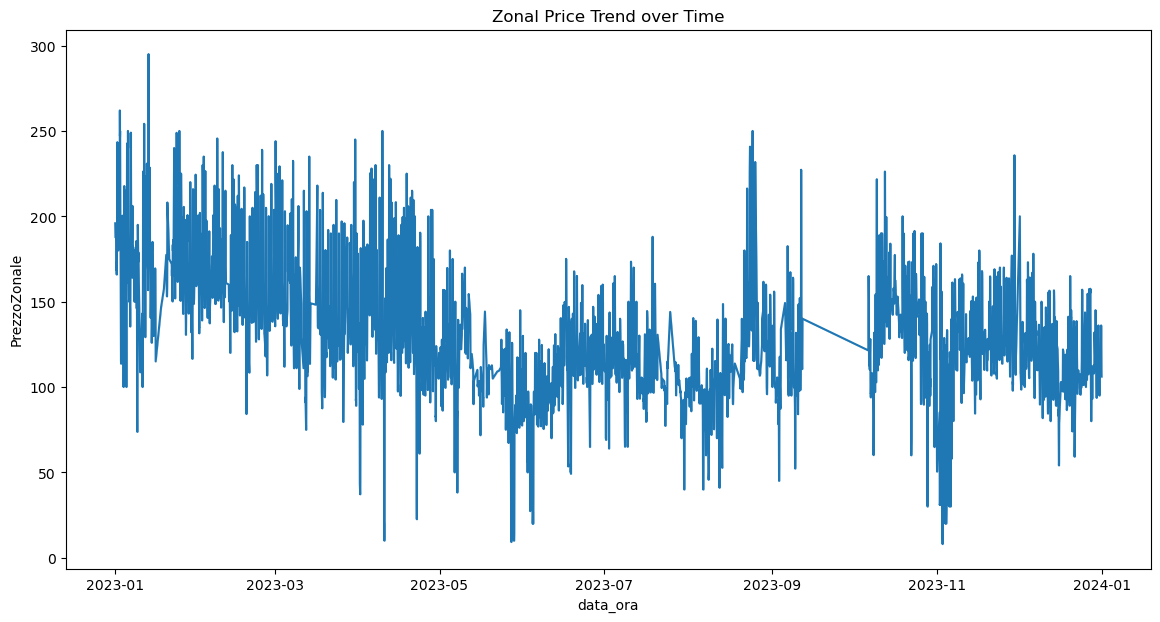

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='data_ora', y='PrezzoZonale', data=df_bid)
plt.title('Zonal Price Trend over Time for BID')
plt.show()

## considering the avarage for each day

/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


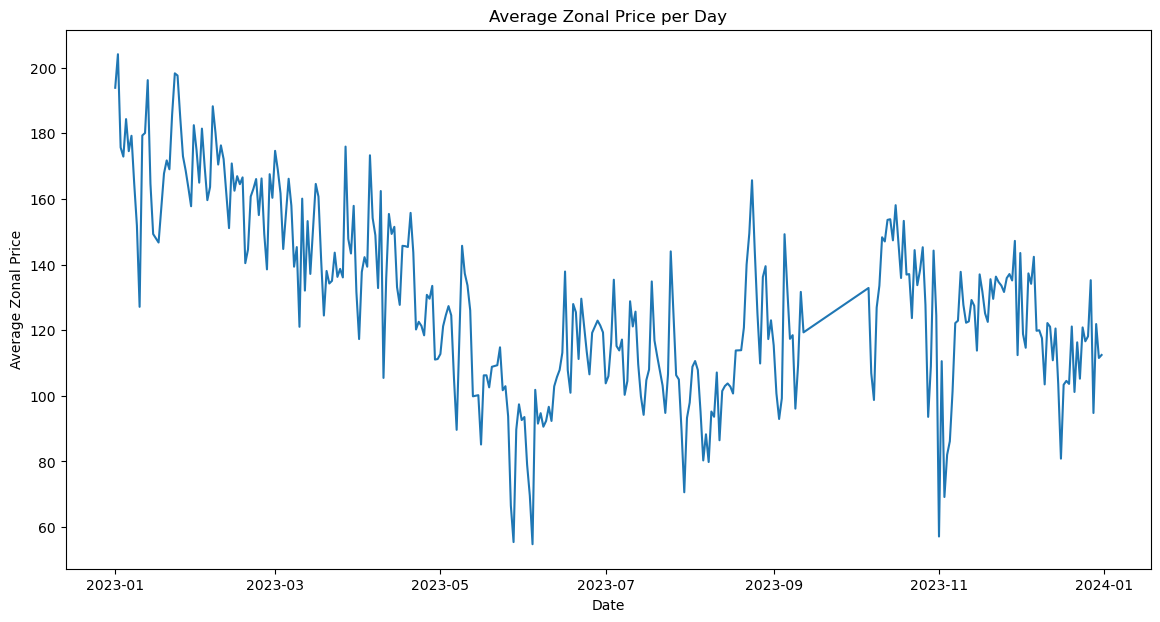

In [29]:
#avarage zonal price per day 

# Create a temporary DataFrame with date extracted from 'data_ora'

df_bid['day'] = df_bid['data_ora'].dt.date

# average zonal price for each day in the temporary DataFrame
average_zonal_price_per_day = df_bid.groupby('day')['PrezzoZonale'].mean().reset_index()

# Plot the average zonal price for each day
plt.figure(figsize=(14, 7))
sns.lineplot(x='day', y='PrezzoZonale', data=average_zonal_price_per_day)
plt.title('Average Zonal Price per Day')
plt.xlabel('Date')
plt.ylabel('Average Zonal Price')
plt.show()


/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


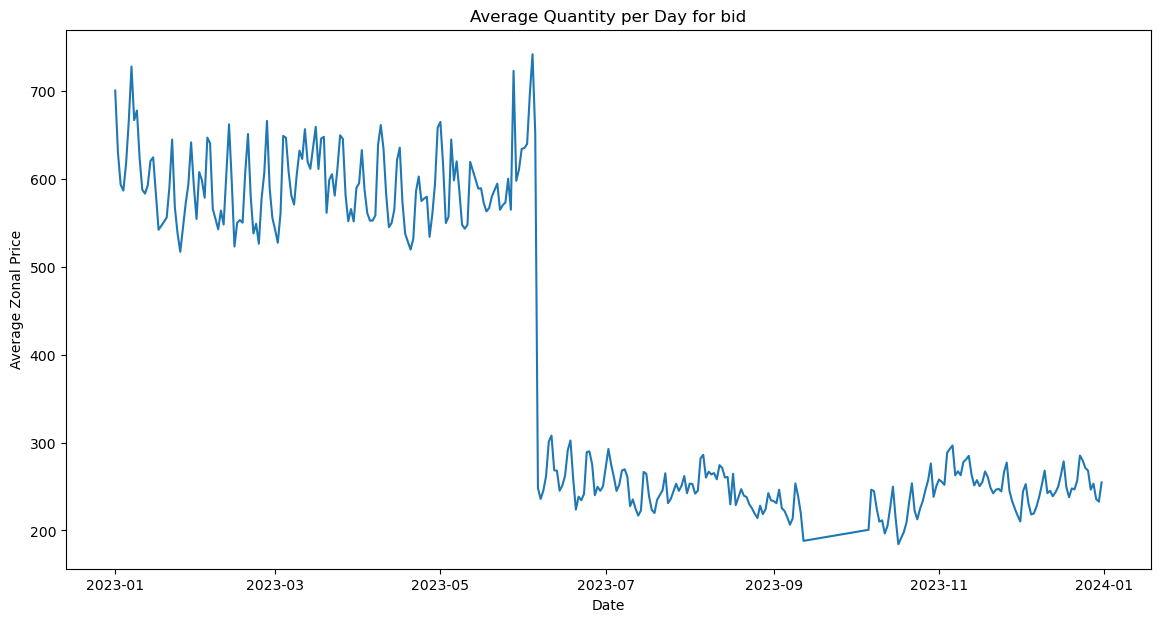

In [33]:
# avarage quantity per day 
df_bid['day'] = df_bid['data_ora'].dt.date

# average zonal price for each day in the temporary DataFrame
average_quantity_per_day = df_bid.groupby('day')['Quantita'].mean().reset_index()

# Plot the average zonal price for each day
plt.figure(figsize=(14, 7))
sns.lineplot(x='day', y='Quantita', data=average_quantity_per_day)
plt.title('Average Quantity per Day for bid')
plt.xlabel('Date')
plt.ylabel('Average Zonal Price')
plt.show()


/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luca.distefano/opt/anaconda3/envs/appliedstatistics/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


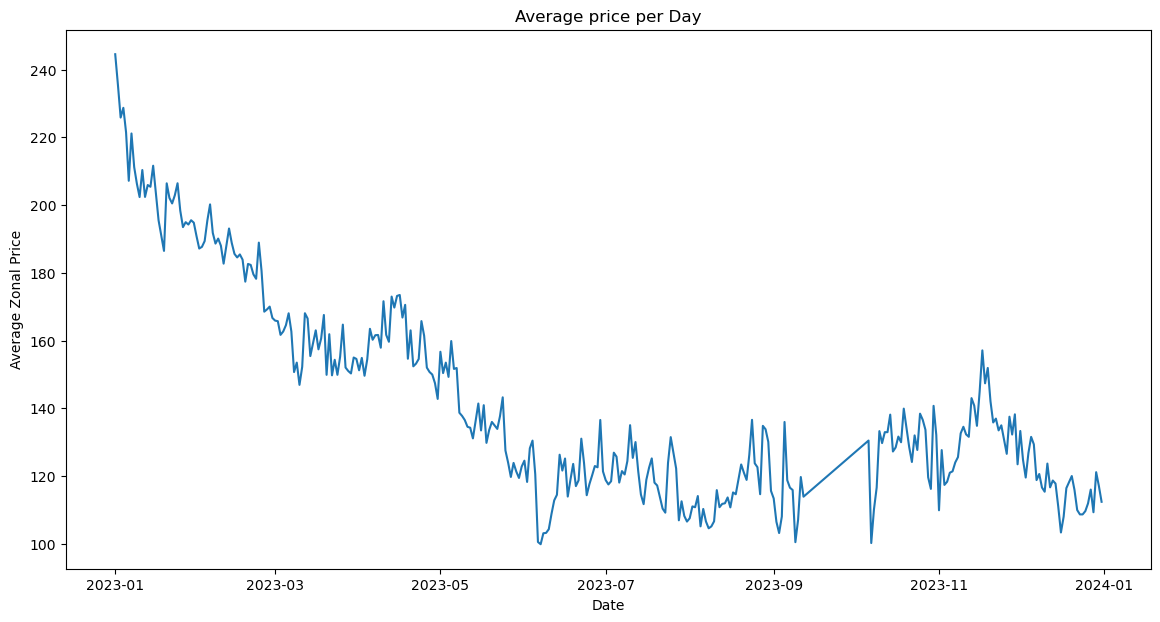

In [31]:
#avarage price for each day 

# average price for each day in the temporary DataFrame
average_price_per_day = df_bid.groupby('day')['Prezzo'].mean().reset_index()

# Plot the average  price for each day
plt.figure(figsize=(14, 7))
sns.lineplot(x='day', y='Prezzo', data=average_price_per_day)
plt.title('Average price per Day')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


In [36]:
missing_values = df.isnull().sum()
missing_values

data_ora        0
PrezzoZonale    0
Quantita        0
Prezzo          0
Tipo            0
dtype: int64

data_ora        0
PrezzoZonale    0
Quantita        0
Prezzo          0
Tipo            0
day             0
day_week        0
dtype: int64

In [38]:
df_bid

,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo,day,day_week
0,2023-01-01 00:00:00,195.90,70000.000,4000.0,OFF,2023-01-01,6
1,2023-01-01 00:00:00,195.90,0.102,3000.0,OFF,2023-01-01,6
2,2023-01-01 00:00:00,195.90,20.001,800.0,OFF,2023-01-01,6
3,2023-01-01 00:00:00,195.90,7.530,700.0,OFF,2023-01-01,6
4,2023-01-01 00:00:00,195.90,0.003,632.0,OFF,2023-01-01,6
...,...,...,...,...,...,...,...
2965412,2023-12-31 23:00:00,106.12,0.100,-15.0,OFF,2023-12-31,6
2965413,2023-12-31 23:00:00,106.12,2.500,-50.0,OFF,2023-12-31,6
2965414,2023-12-31 23:00:00,106.12,11.859,-100.0,OFF,2023-12-31,6
2965415,2023-12-31 23:00:00,106.12,159.709,-150.0,OFF,2023-12-31,6


In [39]:
df_bid = df.loc[df['Tipo'] == 'BID']

df_bid

,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo
159,2023-01-01 00:00:00,195.90,13763.168,4000.00,BID
160,2023-01-01 00:00:00,195.90,2.899,3999.00,BID
161,2023-01-01 00:00:00,195.90,44.453,3950.00,BID
162,2023-01-01 00:00:00,195.90,43.123,3500.00,BID
163,2023-01-01 00:00:00,195.90,3312.717,3000.00,BID
...,...,...,...,...,...
2965494,2023-12-31 23:00:00,106.12,0.007,0.00,BID
2965495,2023-12-31 23:00:00,106.12,50.000,-0.27,BID
2965496,2023-12-31 23:00:00,106.12,9.000,-3.01,BID
2965497,2023-12-31 23:00:00,106.12,54.000,-100.00,BID


In [66]:
filtered_data = df_bid[df_bid['data_ora'].dt.date == pd.to_datetime('2023-01-10').date()]
filtered_data

,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo
62271,2023-01-10 05:00:00,108.60482,16177.778,4000.00,BID
62272,2023-01-10 05:00:00,108.60482,3.505,3999.00,BID
62273,2023-01-10 05:00:00,108.60482,46.983,3950.00,BID
62274,2023-01-10 05:00:00,108.60482,37.303,3500.00,BID
62275,2023-01-10 05:00:00,108.60482,4250.426,3000.00,BID
...,...,...,...,...,...
69643,2023-01-10 23:00:00,143.00000,25.000,23.07,BID
69644,2023-01-10 23:00:00,143.00000,10.000,5.84,BID
69645,2023-01-10 23:00:00,143.00000,0.003,0.00,BID
69646,2023-01-10 23:00:00,143.00000,0.021,-499.00,BID


In [61]:
filtered = df_bid[df_bid['data_ora'] == '2023-01-10 02:00:00']
filtered

,data_ora,PrezzoZonale,Quantita,Prezzo,Tipo
